In [1]:
%matplotlib inline

import math
import scipy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# matplotlib setup
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['image.cmap'] = 'Spectral'

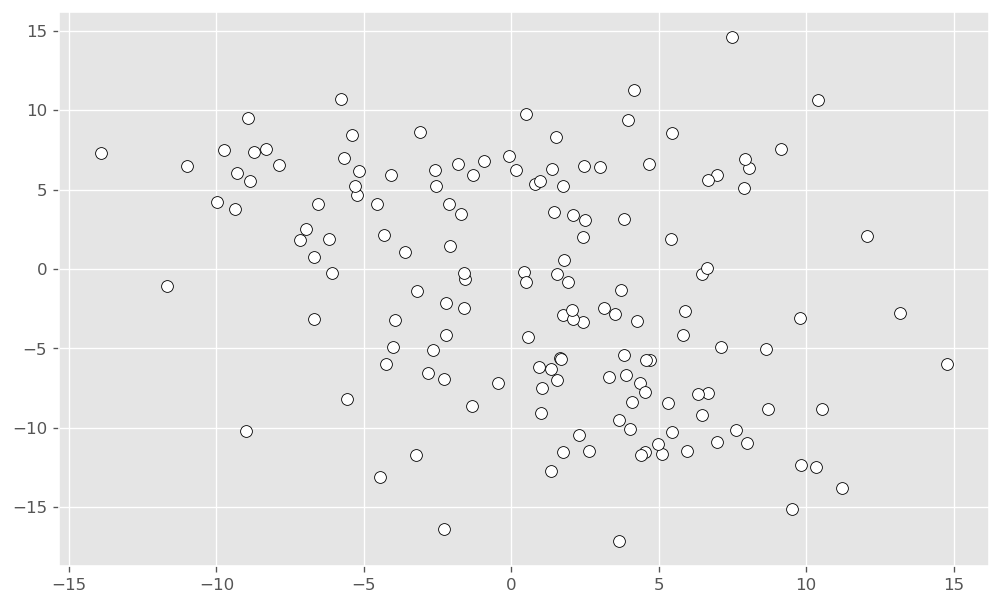

In [3]:
# create random data
X, y = make_blobs(n_samples=150, centers=4, cluster_std=3.9, random_state=10)

# plot data
plt.scatter(X[:, 0], X[:, 1], edgecolors='k', s=50, c='w');

In [4]:
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)
print(labels)

[3 3 1 2 2 3 0 2 3 3 2 2 3 0 0 3 1 3 0 0 2 1 3 0 3 1 2 0 1 1 3 3 2 2 1 1 3
 1 2 3 2 3 0 0 1 1 2 0 0 2 3 2 2 0 2 2 0 2 0 1 0 1 2 1 0 3 1 3 0 3 0 3 0 1
 2 3 3 3 0 2 0 1 2 2 1 0 2 0 3 2 2 3 2 3 2 0 0 0 3 1 1 3 0 2 3 0 0 0 1 1 3
 0 1 0 1 1 3 3 1 3 0 0 1 0 3 2 0 2 0 3 1 3 3 0 3 0 1 3 1 2 2 2 3 2 0 1 2 1
 3 3]


## Using the Kmeans method in mnist dataset

(1797, 64)
number of Errors  1614  Error rate =  90.06696428571429
(10, 64)


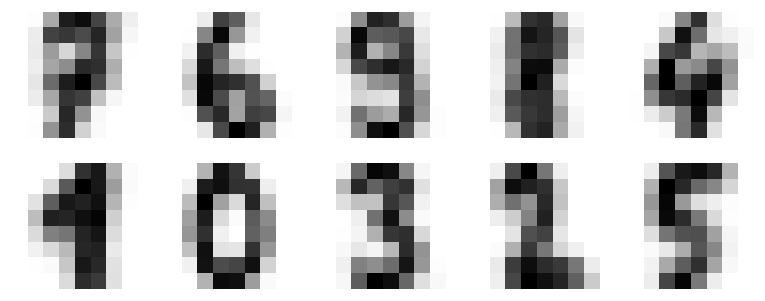

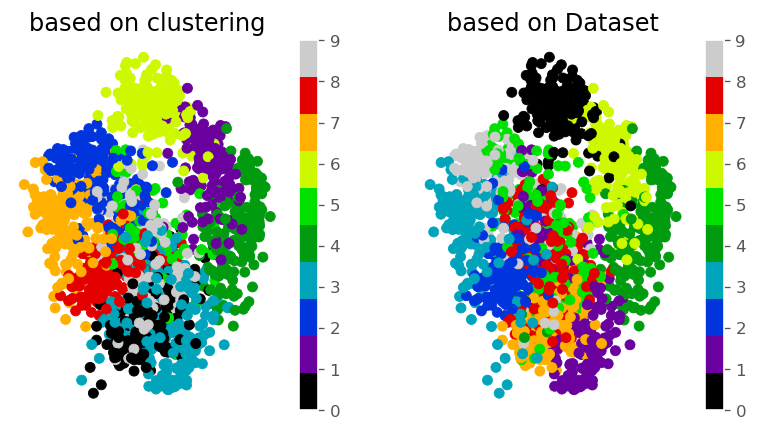

In [82]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data
print(X.shape)

clustered_digits = KMeans(n_clusters=10)
labels = clustered_digits.fit_predict(X)
y = digits.target
e = 0
for i in range(0, 1797):
    if y[i] != labels[i]:
        e += 1
        # print("index= ", i, " ", labels[i], " instead of ", y[i])
print("number of Errors ", e, " Error rate = ", (e * 100) / 1792)

print(clustered_digits.cluster_centers_.shape)

# visualize the cluster centers
fig = plt.figure(figsize=(8, 3))
for j in range(10):
    ax = fig.add_subplot(2, 5, 1 + j)
    ax.imshow(clustered_digits.cluster_centers_[j].reshape((8, 8)), cmap=plt.cm.binary)
    ax.grid(False)
    ax.axis('off')

pca = PCA(n_components=2)
transformed_digits = pca.fit_transform(X)

fig2 = plt.figure(figsize=(8, 4))
ax2 = fig2.add_subplot(1, 2, 1)
scatter = ax2.scatter(transformed_digits[:, 0], transformed_digits[:, 1], c=labels, cmap=plt.cm.get_cmap('nipy_spectral', 10))
ax2.grid(False)
ax2.axis('off')
plt.colorbar(scatter, ax=ax2)
plt.title("based on clustering")

ax3 = fig2.add_subplot(1, 2, 2)
ax3.scatter(transformed_digits[:, 0], transformed_digits[:, 1], c=y, cmap=plt.cm.get_cmap('nipy_spectral', 10))
ax3.grid(False)
ax3.axis('off')
plt.colorbar(scatter, ax=ax3)
plt.title("based on Dataset")

plt.show()
